In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

going to import all 5 data files and attempt to clean them.

In [2]:
Ancestry=pd.read_csv('Unclean Data/Ancestry 1st Response - Unclean.csv')
Age=pd.read_csv('Unclean Data/Average Age - Unclean.csv')
Education=pd.read_csv('Unclean Data/Education - Unclean.csv')
Children=pd.read_csv('Unclean Data/Number of Children ever born - Unclean.csv')
Income=pd.read_csv('Unclean Data/Weekly income - Unclean.csv')

## Clean Ancestry

the goal here is to have a dataframe with a single column, proportion of western european responses

In [3]:
Ancestry = Ancestry.drop(columns="Unnamed: 13")
Ancestry = Ancestry.drop(columns="Unnamed: 14")
Ancestry = Ancestry.drop(Ancestry.index[95])

In [4]:
Ancestry['NewEuropean'] = Ancestry['North-West European'].str.replace(',', '')
Ancestry['NewEuropean'] = Ancestry['NewEuropean'].astype(int)
Ancestry['Total'] = Ancestry['Total'].str.replace(',', '')
Ancestry['Total'] = Ancestry['Total'].astype(int)

In [5]:
Ancestry['Proportion'] = Ancestry['NewEuropean']/Ancestry['Total']

In [6]:
Ancestry=Ancestry.drop(['Oceanian','North-West European','Southern and Eastern European','North African and Middle Eastern','South-East Asian','North-East Asian','Southern and Central Asian','Peoples of the Americas','Sub-Saharan African','Supplementary codes','Not stated','Total','NewEuropean'],axis=1)

In [7]:
Ancestry = Ancestry.drop([93,94],axis=0)
Ancestry

,Name,Proportion
0,Albury,0.561347
1,Auburn,0.102925
2,Ballina,0.580751
3,Balmain,0.473518
4,Bankstown,0.131282
...,...,...
88,Wallsend,0.528365
89,Willoughby,0.391508
90,Wollondilly,0.546110
91,Wollongong,0.413896


In [8]:
Ancestry.to_csv('Clean Data/CleanAncestry.csv')

In [10]:
FedAncestry=pd.read_csv('Unclean Data/FedelecsAncestryUnclean.csv',thousands=',')
FedAncestry = FedAncestry.drop(FedAncestry.index[48])
FedAncestry['Proportion'] = FedAncestry['North-West European']/FedAncestry['Total']
FedAncestry = FedAncestry.drop(FedAncestry.index[0])
FedAncestry=FedAncestry.drop(['Oceanian','North-West European','Southern and Eastern European','North African and Middle Eastern','South-East Asian','North-East Asian','Southern and Central Asian','Peoples of the Americas','Sub-Saharan African','Supplementary codes','Not stated','Total'],axis=1)
FedAncestry['Name'] = FedAncestry['Unnamed: 0']
FedAncestry=FedAncestry.drop(['Unnamed: 0'],axis=1)

columnsTitles=["Name","Proportion"]
FedAncestry=FedAncestry.reindex(columns=columnsTitles)

In [13]:
FedAncestry.head()

,Name,Proportion
1,Banks,0.273465
2,Barton,0.180501
3,Bennelong,0.265087
4,Berowra,0.435631
5,Blaxland,0.123276


In [14]:
FedAncestry.to_csv('Clean Data/CleanFedAncestry.csv')

## Age
the plan here to give us a single average age that very closely approximates to average age, we will approximate 0-9 years as 5, 10-19 as 15, etc and take the average, sum of count*agebracket divided by total

first, commas must be removed from our strings of data then converted to int

update- through research, it seems we can specify commas as equalling thousands in pandas saving a lot of time

after that, i will replace each column with their supertotal (for 0-9 years, 5*0-9years , for 10-19, 15*10-19, etc)

In [15]:
Age=pd.read_csv('Unclean Data/Average Age - Unclean.csv',thousands=',')

In [16]:
Age['0-9 years'] = 5*Age['0-9 years']
Age['10-19 years'] = 15*Age['10-19 years']
Age['20-29 years'] = 25*Age['20-29 years']
Age['30-39 years'] = 35*Age['30-39 years']
Age['40-49 years'] = 45*Age['40-49 years']
Age['50-59 years'] = 55*Age['50-59 years']
Age['60-69 years'] = 65*Age['60-69 years']
Age['70-79 years'] = 75*Age['70-79 years']
Age['80-89 years'] = 85*Age['80-89 years']
Age['90-99 years'] = 95*Age['90-99 years']
Age['100 years and over'] = 105*Age['100 years and over']


In [17]:
Age['supertotal']= Age['0-9 years'] + Age['10-19 years'] + Age['20-29 years'] + Age['30-39 years'] + Age['40-49 years'] + Age['50-59 years'] + Age['60-69 years'] + Age['70-79 years'] + Age['80-89 years'] + Age['90-99 years'] + Age['100 years and over']

In [18]:
Age['Average']= Age['supertotal']/Age['Total']

In [19]:
Age = Age.drop(['0-9 years','10-19 years','20-29 years','30-39 years','40-49 years','50-59 years','60-69 years','70-79 years','80-89 years','90-99 years','100 years and over','Total','supertotal'],axis=1)

In [20]:
Age = Age.drop([93,94,95],axis=0)
Age

,Name,Average
0,Albury,41.462241
1,Auburn,34.877516
2,Ballina,44.227358
3,Balmain,37.889434
4,Bankstown,36.483350
...,...,...
88,Wallsend,39.034127
89,Willoughby,38.551316
90,Wollondilly,40.534859
91,Wollongong,40.575655


In [21]:
Age.to_csv('Clean Data/AverageAge.csv')

In [42]:
FedAge=pd.read_csv('Unclean Data/FedelecsAverageAgeUnclean.csv',thousands=',')
FedAge['0-9 years'] = 5*FedAge['0-9 years']
FedAge['10-19 years'] = 15*FedAge['10-19 years']
FedAge['20-29 years'] = 25*FedAge['20-29 years']
FedAge['30-39 years'] = 35*FedAge['30-39 years']
FedAge['40-49 years'] = 45*FedAge['40-49 years']
FedAge['50-59 years'] = 55*FedAge['50-59 years']
FedAge['60-69 years'] = 65*FedAge['60-69 years']
FedAge['70-79 years'] = 75*FedAge['70-79 years']
FedAge['80-89 years'] = 85*FedAge['80-89 years']
FedAge['90-99 years'] = 95*FedAge['90-99 years']
FedAge['100 years and over'] = 105*FedAge['100 years and over']
FedAge['supertotal']= FedAge['0-9 years'] + FedAge['10-19 years'] + FedAge['20-29 years'] + FedAge['30-39 years'] + FedAge['40-49 years'] + FedAge['50-59 years'] + FedAge['60-69 years'] + FedAge['70-79 years'] + FedAge['80-89 years'] + FedAge['90-99 years'] + FedAge['100 years and over']
FedAge['Average']= FedAge['supertotal']/FedAge['Total']
FedAge = FedAge.drop(['0-9 years','10-19 years','20-29 years','30-39 years','40-49 years','50-59 years','60-69 years','70-79 years','80-89 years','90-99 years','100 years and over','Total','supertotal'],axis=1)
FedAge = FedAge.drop(Age.index[0])
FedAge.rename(columns={'Unnamed: 0':'Name',
                       'Average': 'Fed_AgeAverage'}, inplace=True)
FedAge.head()

,Name,Fed_AgeAverage
1,Banks,39.867943
2,Barton,38.589805
3,Bennelong,38.849113
4,Berowra,40.472466
5,Blaxland,35.997921


In [43]:
FedAge.to_csv('Clean Data/FedAverageAge.csv')

## Education

our education value will be the proportion of the population that has completed high school (year 12)
because we learned of the thousands feature in read csv, this data will be very easy to clean

In [33]:
Education=pd.read_csv('Unclean Data/Education - Unclean.csv',thousands=',')

In [34]:
Education['Proportion']=Education['Year 12 or equivalent']/Education['Total']

In [35]:
Education=Education.drop(['Year 12 or equivalent','Year 11 or equivalent','Year 10 or equivalent','Year 9 or equivalent','Year 8 or below','Did not go to school','Not stated','Not applicable','Total'],axis=1)

In [36]:
Education = Education.drop([93,94,95],axis=0)
Education

,Name,Proportion
0,Albury,0.306550
1,Auburn,0.490746
2,Ballina,0.379375
3,Balmain,0.620436
4,Bankstown,0.409595
...,...,...
88,Wallsend,0.377066
89,Willoughby,0.625696
90,Wollondilly,0.331617
91,Wollongong,0.389358


In [37]:
Education.to_csv('Clean Data/Education.csv')

In [40]:
FedEducation=pd.read_csv('Unclean Data/FedelecsEducationUnclean.csv',thousands=',')
FedEducation['Proportion']=FedEducation['Year 12 or equivalent']/FedEducation['Total']
FedEducation=FedEducation.drop(['Year 12 or equivalent','Year 11 or equivalent','Year 10 or equivalent','Year 9 or equivalent','Year 8 or below','Did not go to school','Not stated','Not applicable','Total'],axis=1)
FedEducation=FedEducation.drop(FedEducation.index[0])
FedEducation=FedEducation.drop([48,49,50])
FedEducation.rename(columns={'District':'Name',
                       'Proportion': 'Fed_EduProportion'}, inplace=True)
FedEducation.head()

,Name,Fed_EduProportion
1,Banks,0.493383
2,Barton,0.537483
3,Bennelong,0.598456
4,Berowra,0.532653
5,Blaxland,0.427016


In [41]:
FedEducation.to_csv('Clean Data/CleanFedEducation.csv')

## Number of children

Number of children will be cleaned similarly to average age, except we needn't times every amount by the average of their range, just how many children they've had, including no children by 0 (or more simply, excluding no children entirely)

Children['one child'] also does not need to be edited


In [44]:
Children=pd.read_csv('Unclean Data/Number of Children ever born - Unclean.csv',thousands = ',')

In [45]:
Children['Two children']= 2*Children['Two children']
Children['Three children']= 3*Children['Three children']
Children['Four children']= 4*Children['Four children']
Children['Five children']= 5*Children['Five children']
Children['Six children']= 6*Children['Six children']
Children['Seven children']= 7*Children['Seven children']
Children['Eight or more children']= 8*Children['Eight or more children']


In [46]:
Children['Supertotal']=Children['One child']+Children['Two children']+Children['Three children']+Children['Four children']+Children['Five children']+Children['Six children']+Children['Seven children']+Children['Eight or more children']

In [47]:
Children['Average']=Children['Supertotal']/Children['Total']

In [48]:
Children=Children.drop(['No children','One child','Two children','Three children','Four children','Five children','Six children','Seven children','Eight or more children','Total','Supertotal'],axis=1)

In [49]:
Children=Children.drop([93,94,95], axis=0)
Children

,Name,Average
0,Albury,1.957339
1,Auburn,1.503916
2,Ballina,1.780289
3,Balmain,0.916856
4,Bankstown,1.800435
...,...,...
88,Wallsend,1.608666
89,Willoughby,1.222031
90,Wollondilly,1.836921
91,Wollongong,1.619093


In [50]:
Children.to_csv('Clean Data/AverageChildren.csv')

In [54]:
FedChildren=pd.read_csv('Unclean Data/FedelectsChildrenUnclean.csv',thousands = ',')
FedChildren['Two children']= 2*FedChildren['Two children']
FedChildren['Three children']= 3*FedChildren['Three children']
FedChildren['Four children']= 4*FedChildren['Four children']
FedChildren['Five children']= 5*FedChildren['Five children']
FedChildren['Six children']= 6*FedChildren['Six children']
FedChildren['Seven children']= 7*FedChildren['Seven children']
FedChildren['Eight or more children']= 8*FedChildren['Eight or more children']
FedChildren['Supertotal']=FedChildren['One child']+FedChildren['Two children']+FedChildren['Three children']+FedChildren['Four children']+FedChildren['Five children']+FedChildren['Six children']+FedChildren['Seven children']+FedChildren['Eight or more children']
FedChildren['Average']=FedChildren['Supertotal']/FedChildren['Total']
FedChildren=FedChildren.drop(['No children','One child','Two children','Three children','Four children','Five children','Six children','Seven children','Eight or more children','Total','Supertotal','Not stated','Not applicable'],axis=1)
FedChildren=FedChildren.drop([0])
FedChildren=FedChildren.drop([48,49,50])
FedChildren.rename(columns={'District':'Name',
                       'Average': 'Fed_ChildAverage'}, inplace=True)
FedChildren.head()

,Name,Fed_ChildAverage
1,Banks,0.606615
2,Barton,0.506451
3,Bennelong,0.527665
4,Berowra,0.658470
5,Blaxland,0.617867


In [55]:
FedChildren.to_csv('Clean Data/CleanFedAverageChildren.csv')

## Average weekly income

for weekly income, we will perform this exactly how we performed counting average age, and use the average of each bracket times the number of respondents under it. this may be a little skewed, but it will be very very close and should result in the same error for all subjects due to the large numbers used in this, we will divide by 100 during the multiplication (ie, the average of 1-149 will be 75/100 = 0.75). additionally, to save some time typing i will be making new, shorter named brackets to count my supertotal.

due to the abysmal column names of this data i am going to manually edit our csv files to make the columns easier to use

In [56]:
Income=pd.read_csv('Unclean Data/Weekly income - Unclean.csv',thousands = ',')

In [57]:
Income['75 Bracket']=0.75*Income['75 Bracket']
Income['225 Bracket']=2.25*Income['225 Bracket']
Income['350 Bracket']=3.50*Income['350 Bracket']
Income['450 Bracket']=4.50*Income['450 Bracket']
Income['575 Bracket']=5.75*Income['575 Bracket']
Income['725 Bracket']=7.25*Income['725 Bracket']
Income['900 Bracket']=9.00*Income['900 Bracket']
Income['1125 Bracket']=11.25*Income['1125 Bracket']
Income['1375 Bracket']=13.75*Income['1375 Bracket']
Income['1625 Bracket']=16.25*Income['1625 Bracket']
Income['1875 Bracket']=18.75*Income['1875 Bracket']
Income['2500 Bracket']=25.00*Income['2500 Bracket']
Income['3000 Bracket']=30.00*Income['3000 Bracket']

In [58]:
Income['Supertotal']=Income['75 Bracket']+Income['225 Bracket']+Income['350 Bracket']+Income['450 Bracket']+Income['575 Bracket']+Income['725 Bracket']+Income['900 Bracket']+Income['1125 Bracket']+Income['1375 Bracket']+Income['1625 Bracket']+Income['1875 Bracket']+Income['2500 Bracket']+Income['3000 Bracket']

In [59]:
Income['Average']=Income['Supertotal']/Income['Total']

In [60]:
Income['Average']=Income['Average']*100

In [61]:
Income=Income.drop(['Nil income','75 Bracket','225 Bracket','350 Bracket','450 Bracket','575 Bracket','725 Bracket','900 Bracket','1125 Bracket','1375 Bracket','1625 Bracket','1875 Bracket','2500 Bracket','3000 Bracket','Total','Supertotal'],axis=1)

In [62]:
Income=Income.drop([93,94,95], axis=0)

In [63]:
Income

,Name,Average
0,Albury,787.124060
1,Auburn,690.836679
2,Ballina,789.434557
3,Balmain,1282.443970
4,Bankstown,630.460980
...,...,...
88,Wallsend,787.601189
89,Willoughby,1257.938572
90,Wollondilly,889.833583
91,Wollongong,755.782342


In [64]:
Income.to_csv('Clean Data/AverageIncome.csv')

In [67]:
FedIncome=pd.read_csv('Unclean Data/FedelecsIncomeUnclean.csv',thousands = ',')
FedIncome['75 Bracket']=0.75*FedIncome['75 Bracket']
FedIncome['225 Bracket']=2.25*FedIncome['225 Bracket']
FedIncome['350 Bracket']=3.50*FedIncome['350 Bracket']
FedIncome['450 Bracket']=4.50*FedIncome['450 Bracket']
FedIncome['575 Bracket']=5.75*FedIncome['575 Bracket']
FedIncome['725 Bracket']=7.25*FedIncome['725 Bracket']
FedIncome['900 Bracket']=9.00*FedIncome['900 Bracket']
FedIncome['1125 Bracket']=11.25*FedIncome['1125 Bracket']
FedIncome['1375 Bracket']=13.75*FedIncome['1375 Bracket']
FedIncome['1625 Bracket']=16.25*FedIncome['1625 Bracket']
FedIncome['1875 Bracket']=18.75*FedIncome['1875 Bracket']
FedIncome['2500 Bracket']=25.00*FedIncome['2500 Bracket']
FedIncome['3000 Bracket']=30.00*FedIncome['3000 Bracket']
FedIncome['Supertotal']=FedIncome['75 Bracket']+FedIncome['225 Bracket']+FedIncome['350 Bracket']+FedIncome['450 Bracket']+FedIncome['575 Bracket']+FedIncome['725 Bracket']+FedIncome['900 Bracket']+FedIncome['1125 Bracket']+FedIncome['1375 Bracket']+FedIncome['1625 Bracket']+FedIncome['1875 Bracket']+FedIncome['2500 Bracket']+FedIncome['3000 Bracket']
FedIncome['Average']=FedIncome['Supertotal']/FedIncome['Total']
FedIncome['Average']=FedIncome['Average']*100
FedIncome=FedIncome.drop(['Nil income','75 Bracket','225 Bracket','350 Bracket','450 Bracket','575 Bracket','725 Bracket','900 Bracket','1125 Bracket','1375 Bracket','1625 Bracket','1875 Bracket','2500 Bracket','3000 Bracket','Total','Supertotal','Not stated','Not applicable','Negative income'],axis=1)
FedIncome=FedIncome.drop([0])
FedIncome=FedIncome.drop([48])
FedIncome.rename(columns={'Unnamed: 0':'Name',
                       'Average': 'Fed_IncAverage'}, inplace=True)
FedIncome.head()

,Name,Fed_IncAverage
1,Banks,646.439758
2,Barton,631.405046
3,Bennelong,736.573384
4,Berowra,793.820798
5,Blaxland,446.488922


In [68]:
FedIncome.to_csv('Clean Data/CleanFedAverageIncome.csv')

### Result data

In [69]:
Result = pd.read_csv('Unclean Data/Result data.csv')

In [70]:
Result.head()

,State,DivisionId,DivisionAb,DivisionName,TCPCandidate,PreferenceVotes,CandidateId,CandidateSurname,PartyAb
0,ACT,101,CANB,Canberra,1,71915,25470,ALP_CANB,ALP
1,ACT,101,CANB,Canberra,2,53140,25472,LP_CANB,LP
2,ACT,102,FENN,Fenner,1,72773,25478,ALP_FRAS,ALP
3,ACT,102,FENN,Fenner,2,43675,25480,LP_FRAS,LP
4,NSW,103,BANK,Banks,1,41167,27557,ALP_BANK,ALP


In [72]:
Result = Result[Result.State == 'NSW']

In [73]:
Result.index = range(len(Result))

In [74]:
Result = Result.drop(['State','DivisionId','DivisionAb','TCPCandidate','CandidateId','CandidateSurname'],axis=1)

In [75]:
Result = Result.sort_values('PreferenceVotes',ascending=False)

In [76]:
Result.drop_duplicates(subset ="DivisionName", inplace = True) 


In [77]:
Result = Result.sort_values('DivisionName')
Result.index = range(len(Result))

In [78]:
Result.to_csv('Clean Data/CleanResult.csv')

In [79]:
Result.head()

,DivisionName,PreferenceVotes,PartyAb
0,Banks,46050,LP
1,Barton,44929,ALP
2,Bennelong,51139,LP
3,Berowra,63720,LP
4,Blaxland,47545,ALP


### Combine those table into one

In [80]:
dfs = [Ancestry, Education, Age, Children, Income]

In [81]:
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='Name'), dfs)

In [82]:
df_final.rename(columns={'Proportion_x':'Ancestry_Proportion',
                          'Proportion_y':'Education_Proportion',
                          'Average_x':'Age_Average',
                          'Average_y':'Children_Average',
                          'Average':'Income_Average'}, 
                 inplace=True)
 

In [83]:
df_final.head()

,Name,Ancestry_Proportion,Education_Proportion,Age_Average,Children_Average,Income_Average
0,Albury,0.561347,0.306550,41.462241,1.957339,787.124060
1,Auburn,0.102925,0.490746,34.877516,1.503916,690.836679
2,Ballina,0.580751,0.379375,44.227358,1.780289,789.434557
3,Balmain,0.473518,0.620436,37.889434,0.916856,1282.443970
4,Bankstown,0.131282,0.409595,36.483350,1.800435,630.460980


In [84]:
df_final.to_csv('Clean Data/All_in_one.csv')

### Data Analysis

In [85]:
import seaborn as sns

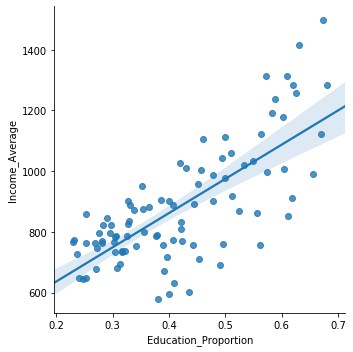

In [86]:
sns.lmplot(x='Education_Proportion', y='Income_Average', data=df_final)

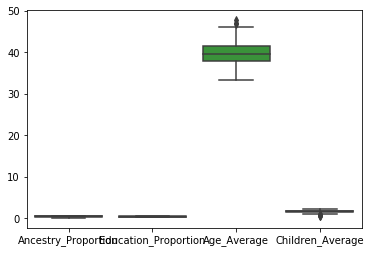

In [87]:
stats_df = df_final.drop(['Income_Average'], axis=1)
sns.boxplot(data=stats_df)

In [88]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

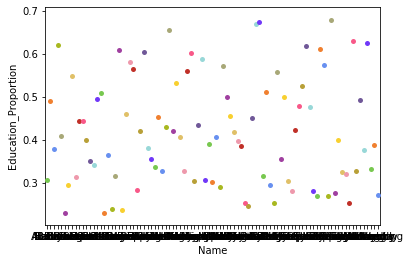

In [89]:
sns.swarmplot(x='Name', y='Education_Proportion', data=df_final, 
              palette=pkmn_type_colors)

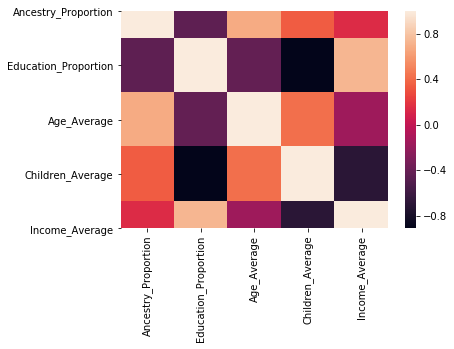

In [90]:
corr = df_final.corr()
sns.heatmap(corr)

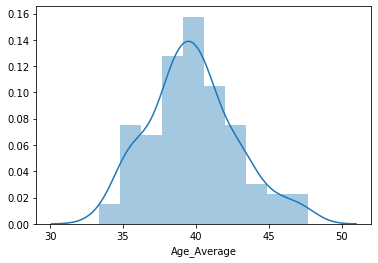

In [91]:
sns.distplot(df_final.Age_Average)

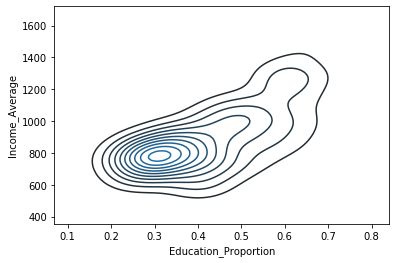

In [92]:
sns.kdeplot(df_final.Education_Proportion,df_final.Income_Average )